<a href="https://colab.research.google.com/github/pietro-crc/Python_projects/blob/main/Nobel_Prize_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning

Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.year.min()

1901

In [8]:
df_data.year.max()

2020


* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
df_data.duplicated().sum()

0

### Check for NaN Values

In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [11]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


#### Add a Column with the Prize Share as a Percentage

In [12]:

separated_values = df_data.prize_share.str.split('/', expand=True)

numerator = pd.to_numeric(separated_values[0])

denomenator = pd.to_numeric(separated_values[1])

df_data['share_pct'] = numerator / denomenator

In [13]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

Created a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [14]:
fig = px.pie(df_data, names='sex', title='Percentage of Male vs. Female Winners',hole = .4)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?


* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [15]:
df_women = df_data.loc[df_data.sex == 'Female']

In [16]:
df_women.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Italy,Female,NaN,NaN,NaN,ITA,1.00


# Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they?

In [17]:
# Find all duplicated rows
duplicated_rows = df_data[df_data.duplicated(subset=['full_name'],keep = False)]


col_subset = ['year', 'category', 'laureate_type', 'full_name']
duplicated_rows[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category


* In how many categories are prizes awarded?
* Created a plotly bar chart with the number of prizes awarded by category.
* Used the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [18]:
df_data.category.value_counts()


Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [19]:
fig = px.pie(df_data, values = df_data.category.value_counts(),names=df_data.category.value_counts().index ,title = 'prizes awarded')

fig.show()


* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [20]:
economics = df_data.loc[df_data.category == 'Economics']
id = economics.year.idxmin()
economics.year.min()


1969

In [21]:
df_data.loc[id].to_frame().T

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

Created a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?



In [22]:
value =  df_data.groupby('category')[['sex']].value_counts()
value_df = value.to_frame()
value_df.reset_index(inplace=True)
value_df.rename(columns={0: 'count'}, inplace=True)
value_df


,category,sex,count
0,Chemistry,Male,179
1,Chemistry,Female,7
2,Economics,Male,84
3,Economics,Female,2
4,Literature,Male,101
5,Literature,Female,16
6,Medicine,Male,210
7,Medicine,Female,12
8,Peace,Male,90
9,Peace,Female,17


In [23]:
fig = px.bar(value_df, x= value_df.category, y=value_df['count'],color=value_df['sex'], title="Wide-Form Input")
fig.show()

# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Counted the number of prizes awarded every year.
* Created a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimposed the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (used NumPy).


* Used the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [24]:
data_time = df_data.year.value_counts().to_frame()
data_time.reset_index(inplace=True)

data_time.rename(columns={'year': 'sum'}, inplace=True)
data_time.rename(columns={'index': 'year'}, inplace=True)
data_time.rename(columns={'level_0': 'index'}, inplace=True)

data_time

,year,sum
0,2001,15
1,2019,14
2,1996,13
3,2018,13
4,2000,13
...,...,...
112,1915,4
113,1924,3
114,1914,3
115,1918,2


In [25]:
data_time.year = pd.to_numeric(data_time.year)
v= data_time.sort_values(by= 'year')
v

,year,sum
84,1901,6
71,1902,7
73,1903,7
82,1904,6
95,1905,5
...,...,...
27,2016,11
23,2017,12
3,2018,13
1,2019,14


In [26]:



rolling_average = v['sum'].rolling(window=5).mean()

v['Media Mobile 5 Anni'] = rolling_average

v

,year,sum,Media Mobile 5 Anni
84,1901,6,NaN
71,1902,7,NaN
73,1903,7,NaN
82,1904,6,NaN
95,1905,5,6.20
...,...,...,...
27,2016,11,11.60
23,2017,12,12.00
3,2018,13,12.00
1,2019,14,12.20


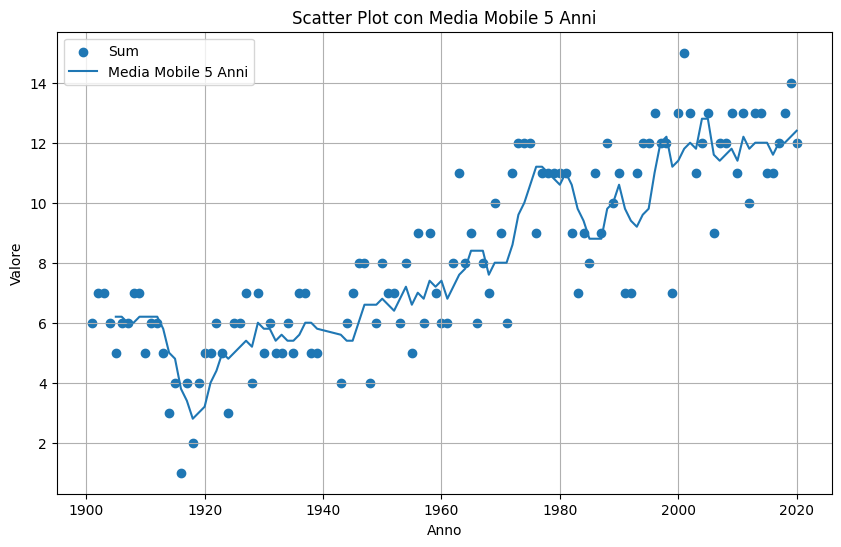

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(v['year'], v['sum'], label='Sum')
plt.plot(v['year'], v['Media Mobile 5 Anni'], label='Media Mobile 5 Anni', linestyle='-')


plt.xlabel('Anno')
plt.ylabel('Valore')
plt.title('Scatter Plot con Media Mobile 5 Anni')
plt.legend()

plt.grid(True)
plt.show()

# Are More Prizes Shared Than Before?

Investigate if more prizes are shared than before.

* Calculated the average prize share of the winners on a year by year basis.
* Calculated the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modifyed the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* inverted the secondary y-axis to make the relationship even more clear.

In [28]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [29]:
data_average = df_data.groupby('year').agg({'share_pct':pd.Series.mean})
data_average = data_average.reset_index()

In [30]:

rolling_average = data_average['share_pct'].rolling(window=5).mean()

data_average['average 5 year'] = rolling_average

data_average

,year,share_pct,average 5 year
0,1901,0.83,NaN
1,1902,0.71,NaN
2,1903,0.71,NaN
3,1904,0.83,NaN
4,1905,1.00,0.82
...,...,...,...
112,2016,0.55,0.52
113,2017,0.50,0.50
114,2018,0.46,0.50
115,2019,0.43,0.50


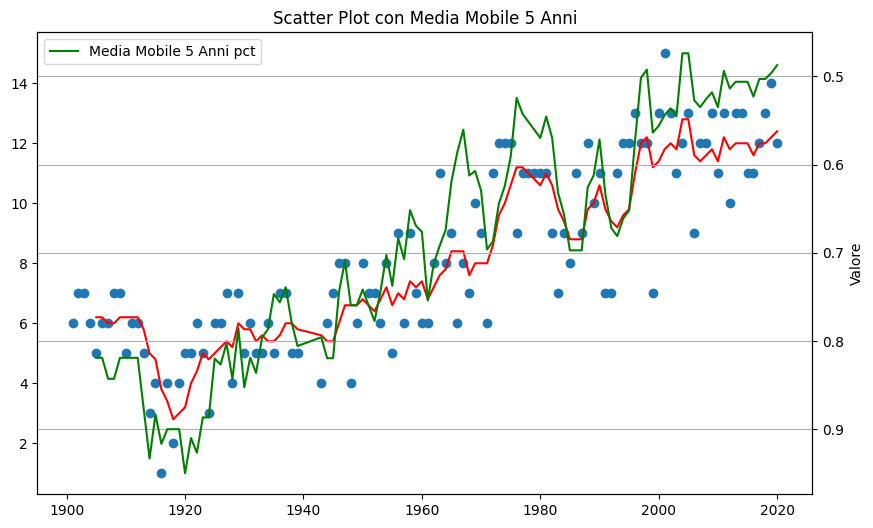

In [31]:
plt.figure(figsize=(10, 6))
ax1= plt.gca()
ax1.scatter(v['year'], v['sum'], label='Sum')
ax1.plot(v['year'], v['Media Mobile 5 Anni'], label='Media Mobile 5 Anni', linestyle='-',color='red')
ax2 = plt.twinx()
ax2.plot(data_average['year'], data_average['average 5 year'], label='Media Mobile 5 Anni pct', linestyle='-',color= 'green')
ax2.invert_yaxis()
plt.xlabel('Anno')
plt.ylabel('Valore')
plt.title('Scatter Plot con Media Mobile 5 Anni')
plt.legend()


plt.grid(True)
plt.show()

# The Countries with the Most Nobel Prizes


* Created a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.


* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then used plotly to create a horizontal bar chart showing the number of prizes won by each country.

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [32]:
nobel_country = df_data.birth_country_current.value_counts()


df_country = nobel_country.to_frame()
df_nobel_country = df_country.reset_index()

df_nobel_country.rename(columns={'index': 'Country', 'birth_country_current': 'Prize Won'}, inplace=True)

df_nobel_country
country_20 = df_nobel_country[:20]

In [33]:
fig = px.bar(df_nobel_country[:20],'Prize Won','Country',title='Price Won by Country',color = 'Prize Won', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_yaxes(categoryorder='total ascending',color="seagreen")

fig.show()

In [34]:
pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.1 MB/s eta 0:00:00


In [35]:
import country_converter as coco

In [36]:
df_nobel_country['ISO'] = coco.convert(names=df_nobel_country.Country, to='ISO3')
df_nobel_country

,Country,Prize Won,ISO
0,United States of America,281,USA
1,United Kingdom,105,GBR
2,Germany,84,DEU
3,France,57,FRA
4,Sweden,29,SWE
...,...,...,...
74,Republic of Macedonia,1,MKD
75,Venezuela,1,VEN
76,Bulgaria,1,BGR
77,Madagascar,1,MDG


# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Created a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):


* used the ISO codes


In [37]:
fig = px.choropleth(df_nobel_country, locations="ISO",
                    color="Prize Won",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()


# In Which Categories are the Different Countries Winning Prizes?

Divided up the plotly bar chart above to show which categories made up the total number of prizes.


* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?





In [38]:
country_by_nobel = df_data.groupby('birth_country_current')[['category']].value_counts()
data = country_by_nobel.to_frame()
data_reset = data.reset_index()

data_reset

,birth_country_current,category,0
0,Algeria,Literature,1
1,Algeria,Physics,1
2,Argentina,Medicine,2
3,Argentina,Peace,2
4,Australia,Medicine,7
...,...,...,...
206,United States of America,Literature,10
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [39]:
country_20 = df_data.birth_country_current.value_counts()
data1 = country_20[:20].to_frame()
data = data1.reset_index()
data.columns = ['birth_country_current','Total']

data_reset.rename(columns={0:'Total'}, inplace=True)
data_reset['Total_nobels']= data_reset.groupby('birth_country_current')['Total'].transform(np.sum)
data_sort = data_reset.sort_values('Total_nobels',ascending= False )
data_sort_20 = data_sort
data_sort_20

merged = pd.merge(data_sort_20,data,on='birth_country_current')
merged

,birth_country_current,category,Total_x,Total_nobels,Total_y
0,United States of America,Economics,49,281,281
1,United States of America,Chemistry,55,281,281
2,United States of America,Medicine,78,281,281
3,United States of America,Peace,19,281,281
4,United States of America,Literature,10,281,281
...,...,...,...,...,...
103,Hungary,Medicine,2,9,9
104,Hungary,Literature,1,9,9
105,Hungary,Physics,2,9,9
106,Hungary,Economics,1,9,9


In [40]:

fig = px.bar(merged,'Total_x','birth_country_current' ,color = 'category')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculated the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Created a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [41]:
year = df_data.groupby(['birth_country_current','year'],as_index=False).agg({'prize':pd.Series.count})

year['CumulativaPremi'] = year.groupby('birth_country_current')['prize'].cumsum()
year

,birth_country_current,year,prize,CumulativaPremi
0,Algeria,1957,1,1
1,Algeria,1997,1,2
2,Argentina,1936,1,1
3,Argentina,1947,1,2
4,Argentina,1980,1,3
...,...,...,...,...
622,United States of America,2020,7,281
623,Venezuela,1980,1,1
624,Vietnam,1973,1,1
625,Yemen,2011,1,1


In [42]:
fig = px.line(year, x="year", y="CumulativaPremi", title='Prize variation',color= 'birth_country_current')
fig.show()

# What are the Top Research Organisations?

Created a bar chart showing the organisations affiliated with the Nobel laureates.

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [43]:
organisation = df_data.organization_name.value_counts().to_frame()
finaldf = organisation.reset_index()
finaldf.columns = ['organisation','Total']
finaldf

,organisation,Total
0,University of California,40
1,Harvard University,29
2,Stanford University,23
3,Massachusetts Institute of Technology (MIT),21
4,University of Chicago,20
...,...,...
259,Biozentrum der Universität,1
260,Tufts University,1
261,"Central Research Laboratories, EMI",1
262,International Centre for Theoretical Physics,1


In [44]:
fig = px.bar(finaldf[:20],'Total','organisation', color = 'Total', title='Nobel per Organisation ')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  


* Created another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [45]:
organisation = df_data.organization_city.value_counts().to_frame()
finaldf = organisation.reset_index()
finaldf.columns = ['organisation_city','Total']
finaldf

,organisation_city,Total
0,"Cambridge, MA",50
1,"New York, NY",45
2,Cambridge,31
3,London,27
4,Paris,25
...,...,...
182,"Yorktown Heights, NY",1
183,Altenberg; Grünau im Almtal,1
184,Ottawa,1
185,Grenoble,1


In [46]:
fig = px.bar(finaldf[:20],'Total','organisation_city', color = 'Total', title='Nobel per City ')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities


* Created a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Used a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [47]:
pip install plotly-express --upgrade

In [48]:
import plotly.express as px

In [49]:

organisation = df_data.birth_city.value_counts().to_frame()
finaldf = organisation.reset_index()
finaldf.columns = ['birth_city','Total']


In [50]:
fig = px.bar(finaldf[:20],'Total','birth_city', color = 'Total', title='Nobel per City ')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
#fig.update_traces(marker_color=px.colors.Plasma())
fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation


* Created a DataFrame that groups the number of prizes by organisation.
* Then used the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)



In [51]:
sunburst1 = df_data.groupby(['organization_country','organization_city','organization_name']).agg({'prize':pd.Series.count})
sunburst2 = sunburst1.reset_index()

In [52]:
fig = px.sunburst(
    sunburst2,path =['organization_country','organization_city','organization_name'],
    values = 'prize',
    title = 'Where do Discoveries Take Place?')
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

Calculated the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame.  used [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help.



In [53]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [54]:
df_data['birth_YEAR'] = df_data.birth_date.dt.year
df_data['author_year_when_nobel'] = df_data.year - df_data.birth_YEAR

df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,birth_YEAR,author_year_when_nobel
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,"1,852.00",49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,"1,839.00",62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,"1,854.00",47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,"1,822.00",79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,"1,828.00",73.00


### Who were the oldest and youngest winners?


* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Used Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experimented with the number of `bins` to see how the visualisation changes.

In [55]:
idmin = df_data.author_year_when_nobel.idxmin()
df_data.loc[idmin].to_frame()

,885
year,2014
category,Peace
prize,The Nobel Peace Prize 2014
motivation,"""for their struggle against the suppression of..."
prize_share,1/2
laureate_type,Individual
full_name,Malala Yousafzai
birth_date,1997-07-12 00:00:00
birth_city,Mingora
birth_country,Pakistan


In [56]:
idmax = df_data.author_year_when_nobel.idxmax()
df_data.loc[idmax].to_frame()

,937
year,2019
category,Chemistry
prize,The Nobel Prize in Chemistry 2019
motivation,“for the development of lithium-ion batteries”
prize_share,1/3
laureate_type,Individual
full_name,John Goodenough
birth_date,1922-07-25 00:00:00
birth_city,Jena
birth_country,Germany


In [57]:
import seaborn

In [58]:
df_data.groupby('category').agg({'author_year_when_nobel':pd.Series.mean})

,author_year_when_nobel
category,
Chemistry,58.82
Economics,66.97
Literature,64.79
Medicine,58.58
Peace,60.90
Physics,56.44


<Axes: xlabel='category', ylabel='author_year_when_nobel'>

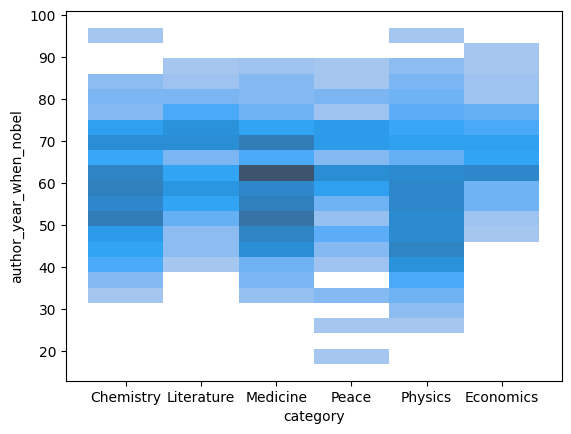

In [59]:
seaborn.histplot(data= df_data,x='category',y='author_year_when_nobel',bins='auto'
)

In [60]:
ages = df_data["author_year_when_nobel"]
ages.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: author_year_when_nobel, dtype: float64

<Axes: xlabel='author_year_when_nobel', ylabel='Count'>

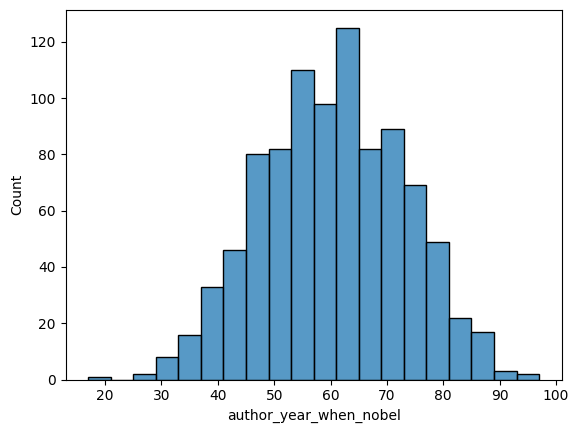

In [61]:
sns.histplot(ages, bins=20)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?


* Used Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


<Axes: xlabel='year', ylabel='author_year_when_nobel'>

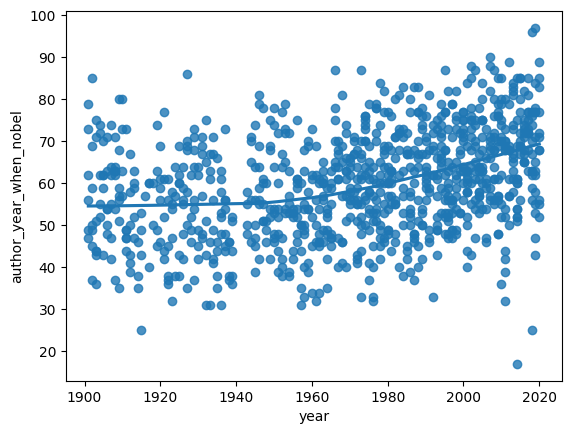

In [62]:
seaborn.regplot(df_data,y='author_year_when_nobel',x='year',lowess=True)

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Used Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [64]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,birth_YEAR,author_year_when_nobel
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,"1,852.00",49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,"1,839.00",62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,"1,854.00",47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,"1,822.00",79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,"1,828.00",73.00


<Axes: xlabel='category', ylabel='author_year_when_nobel'>

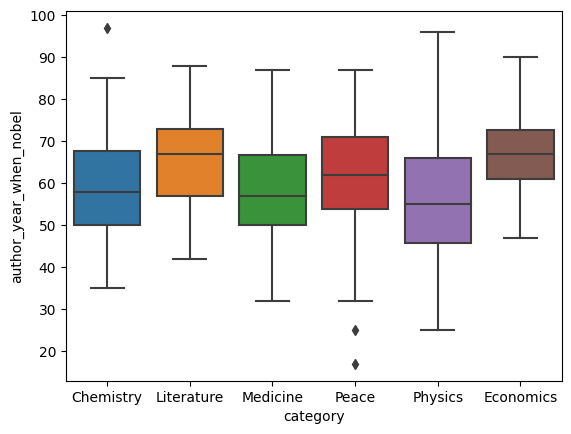

In [66]:
seaborn.boxplot(df_data, y = 'author_year_when_nobel', x= 'category')


* Used Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Created another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


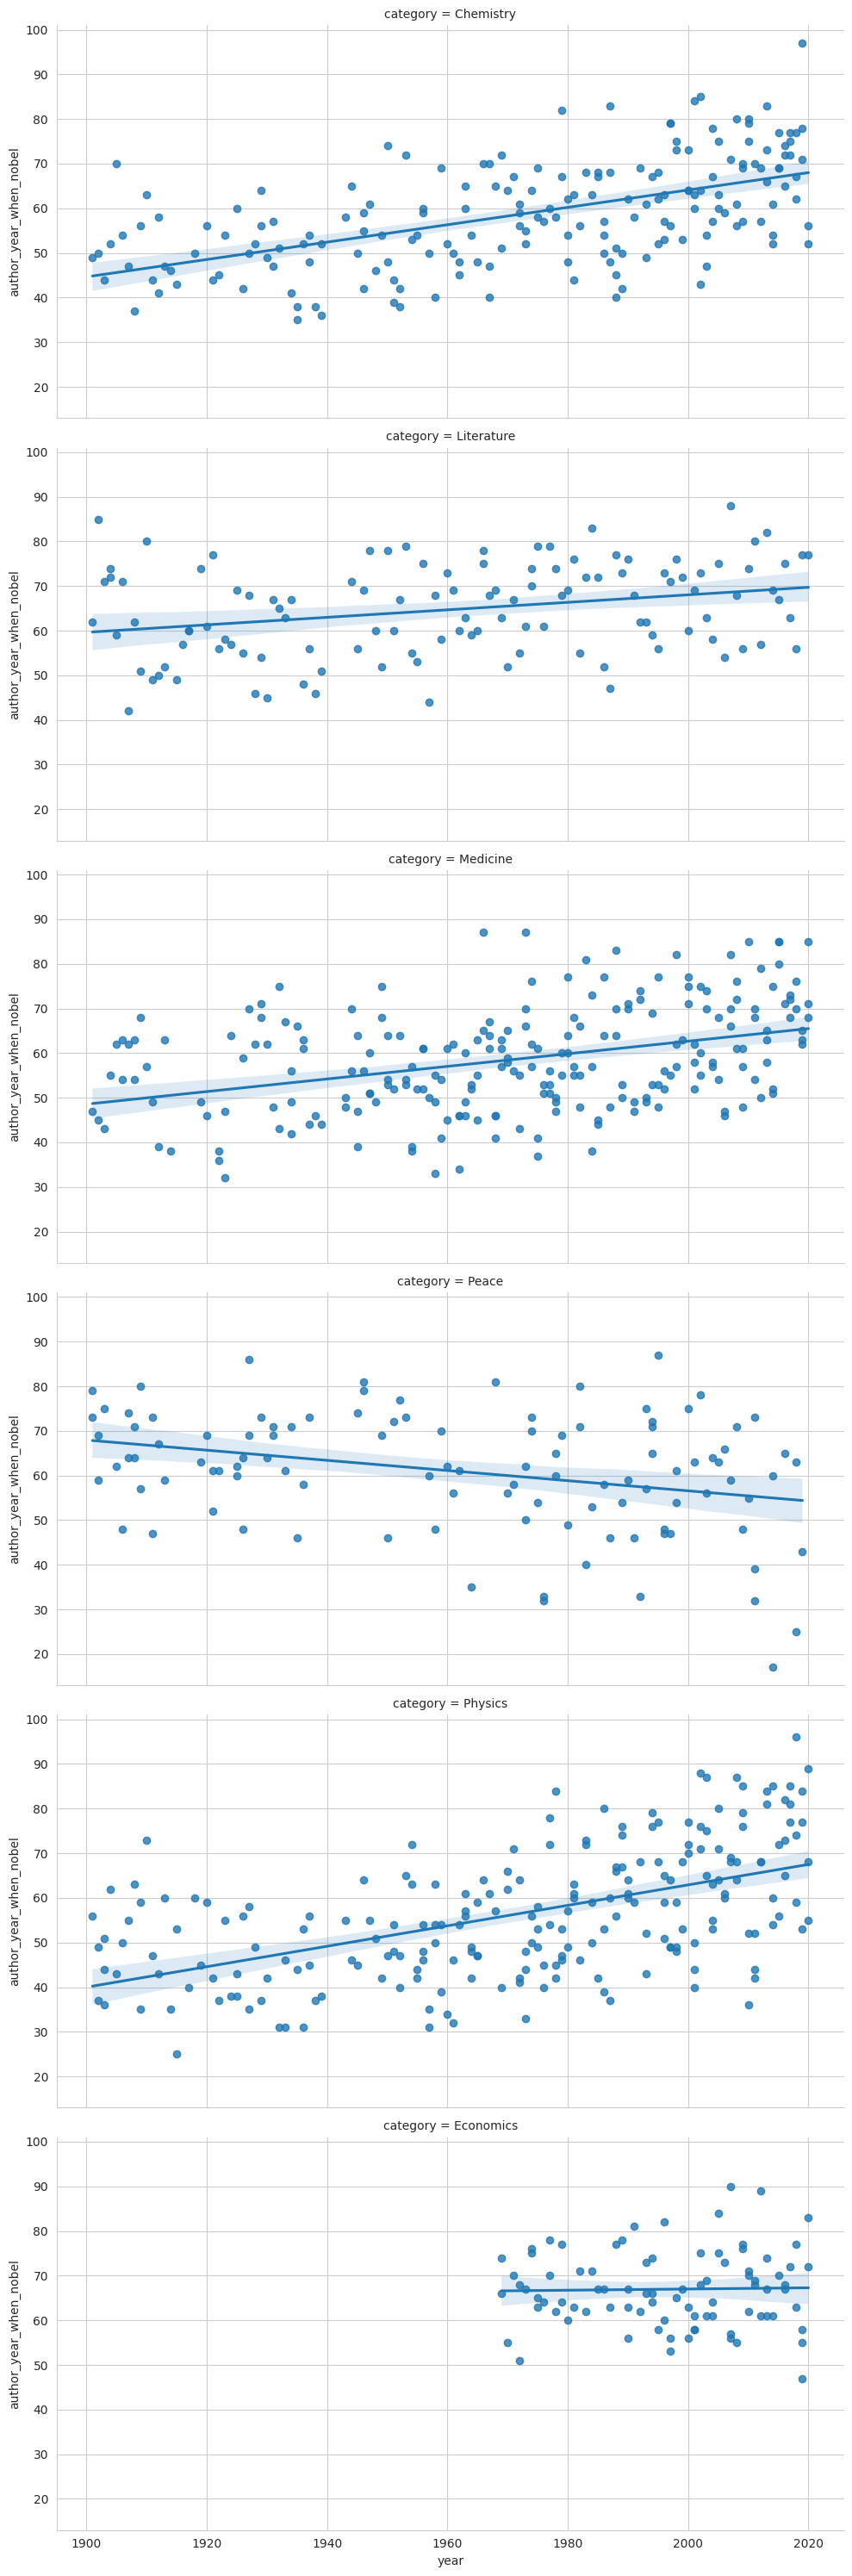

In [74]:
with sns.axes_style('whitegrid'):
  seaborn.lmplot(df_data, y='author_year_when_nobel', x='year', row = 'category', aspect=2)

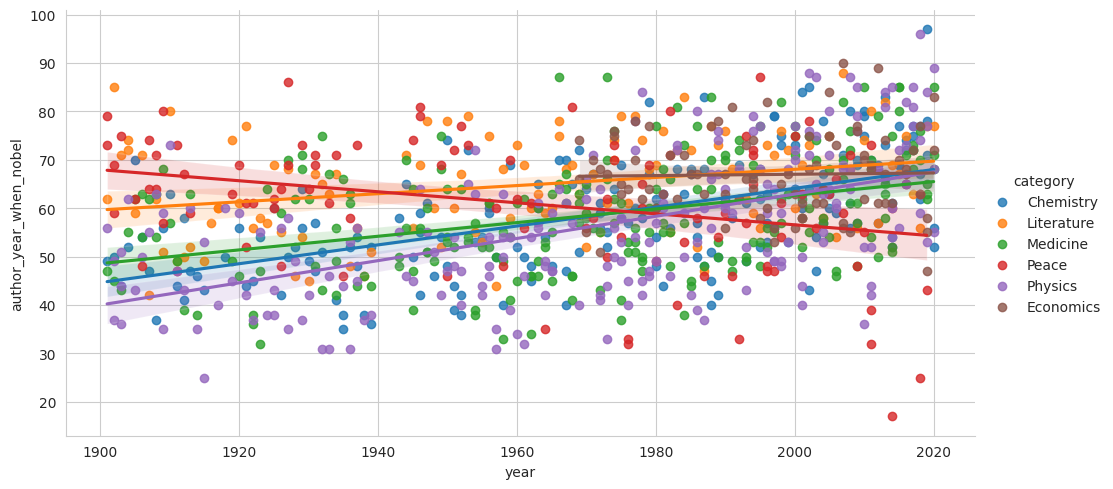

In [73]:
with sns.axes_style('whitegrid'):
  seaborn.lmplot(df_data, y='author_year_when_nobel', x='year', hue = 'category',aspect = 2)